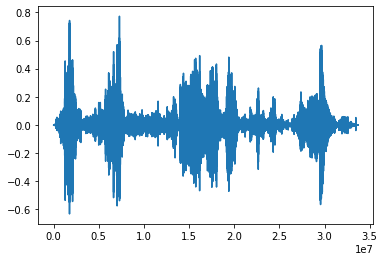

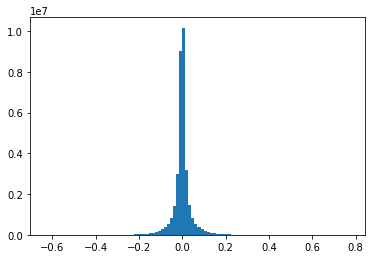

In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt

# 1. Getting started
# import data
amp_data = np.load('amp_data.npz')['amp_data']

# core question 1
plt.figure()
plt.plot(amp_data)
plt.show()

hist_stuff = plt.hist(amp_data, bins=100)
plt.show()

new_amp_data = np.reshape(amp_data[:-(len(amp_data) % 21)], (-1, 21))
train_set, val_set, test_set = np.split(new_amp_data, [int(len(new_amp_data) * 0.7), int(len(new_amp_data) * 0.85)])
np.random.seed(42)
train_set = np.random.permutation(train_set)
val_set = np.random.permutation(val_set)
test_set = np.random.permutation(test_set)
X_shuf_train, y_shuf_train = train_set[:, :-1], train_set[:, -1]
X_shuf_val, y_shuf_val = val_set[:, :-1], val_set[:, -1]
X_shuf_test, y_shuf_test = test_set[:, :-1], test_set[:, -1]

In [11]:
# 2. Curve fitting on a snippet of audio

# Plot the points in one row of your X_shuf_train data against the numbers t

# phi function
def phi_quadratic(x):
    return np.hstack([np.ones((x.shape[0], 1)), x, x ** 2, x ** 3, x ** 4])
row_n = 0
t = [i / 20 for i in range(21)]
w_fit_linear = np.linalg.lstsq([t[:-1]], X_shuf_train[row_n], rcond=None)[0]
w_fit_quadratic = np.linalg.lstsq([t[:-1]], phi_quadratic(X_shuf_train[row_n]), rcond=None)[0]

N = 1

plt.subplot(111)
# color = plt.cm.rainbow(np.linspace(0, 1, N))
# for i, c in zip(range(N), color):

plt.plot(t[:-1], X_shuf_train[row_n], 'x')
plt.plot(1, y_shuf_train[row_n], 'x')
plt.plot(t, t@w_fit_linear)
plt.show()


LinAlgError: Incompatible dimensions